# Task 3: Are Indian teachers good at STEM content? (Audience Engagement and Content Reception)
## Engagement Metrics Analysis: Look into the comments, likes, and dislikes to gauge audience reception.
Analyze:
* Whether Indian STEM videos have higher or lower engagement than non-STEM or non-Indian content.
* Disaggregate likes, dislikes, and comments per video to assess the audience's interest in Indian educational content

## Sentiment Analysis / Text Analysis: What are the comments talking about? Are they discuss about the course content or just praising the content creator?
Crawl some top comments of a sample of videos using Youtube API.
Conduct sentiment analysis on comments to identify overall viewer attitudes. For deeper insights, categorize/cluster sentiments by themes or common terms to see what aspects of content resonate most. (e.g some topics have more negative sentiment than others?)
Conducting Commenter (or channel) network analysis to see what kind of STEM videos are usually studied together (or made by a channel)

In [1]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
long_df = pd.read_csv('videos_with_metrics.csv')
short_df = pd.read_csv('sample_with_metrics.csv')
df = pd.concat([short_df, long_df])
df.head(3)

,categories,channel_id,crawl_date,dislike_count,display_id,duration,like_count,tags,title,upload_date,...,subscribers_cc,country,is_stem_title,title_matched_keywords,is_stem_tags,tag_matched_tags,tag_matched_keywords,comments,fav_count,comment_count
0,Education,UCbYmF43dpGHz8gi2ugiXr0Q,2019-11-15 06:14:39.937759,0.0,Ah2r7TCcE-U,491,377.0,"Medicine,Exam Preparation,Medical Videos,Meduc...",Airway Resistance: Breathing and Lung Mechani...,2019-07-01 00:00:00,...,217745.0,US,True,physiology,True,"Lungs Physiology, Physiology",physiology,"{""@babygurll7"": [""This helped me sooo much aft...",0.0,10.0
1,Education,UCs_6DXZROU29pLvgQdCx4Ww,2019-11-23 03:55:12.306126,126.0,LQtXu4k44Mo,335,5732.0,Global Wealth Inequality - The TRUTH About The...,Global Wealth Inequality - The TRUTH About The 1%,2018-11-24 00:00:00,...,1900000.0,CA,True,inequality,True,"Global Inequality, Global Wealth Inequality, G...",inequality,"{""@successmindsxt"": [""The future is entreprene...",0.0,342.0
2,Education,UCUdgDNPGYCRJraG3BGxF2UA,2019-11-12 20:10:07.288370,1.0,RThSYqEKAC4,127,21.0,"Dell,laptop,repair,tutorial,how-to,installatio...",Dell Inspiron 11 (3147) CMOS Battery How-To Vi...,2014-12-02 00:00:00,...,43600.0,US,True,cmos,True,CMOS Battery,cmos,{},0.0,0.0


In [13]:
len(df)

72056

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


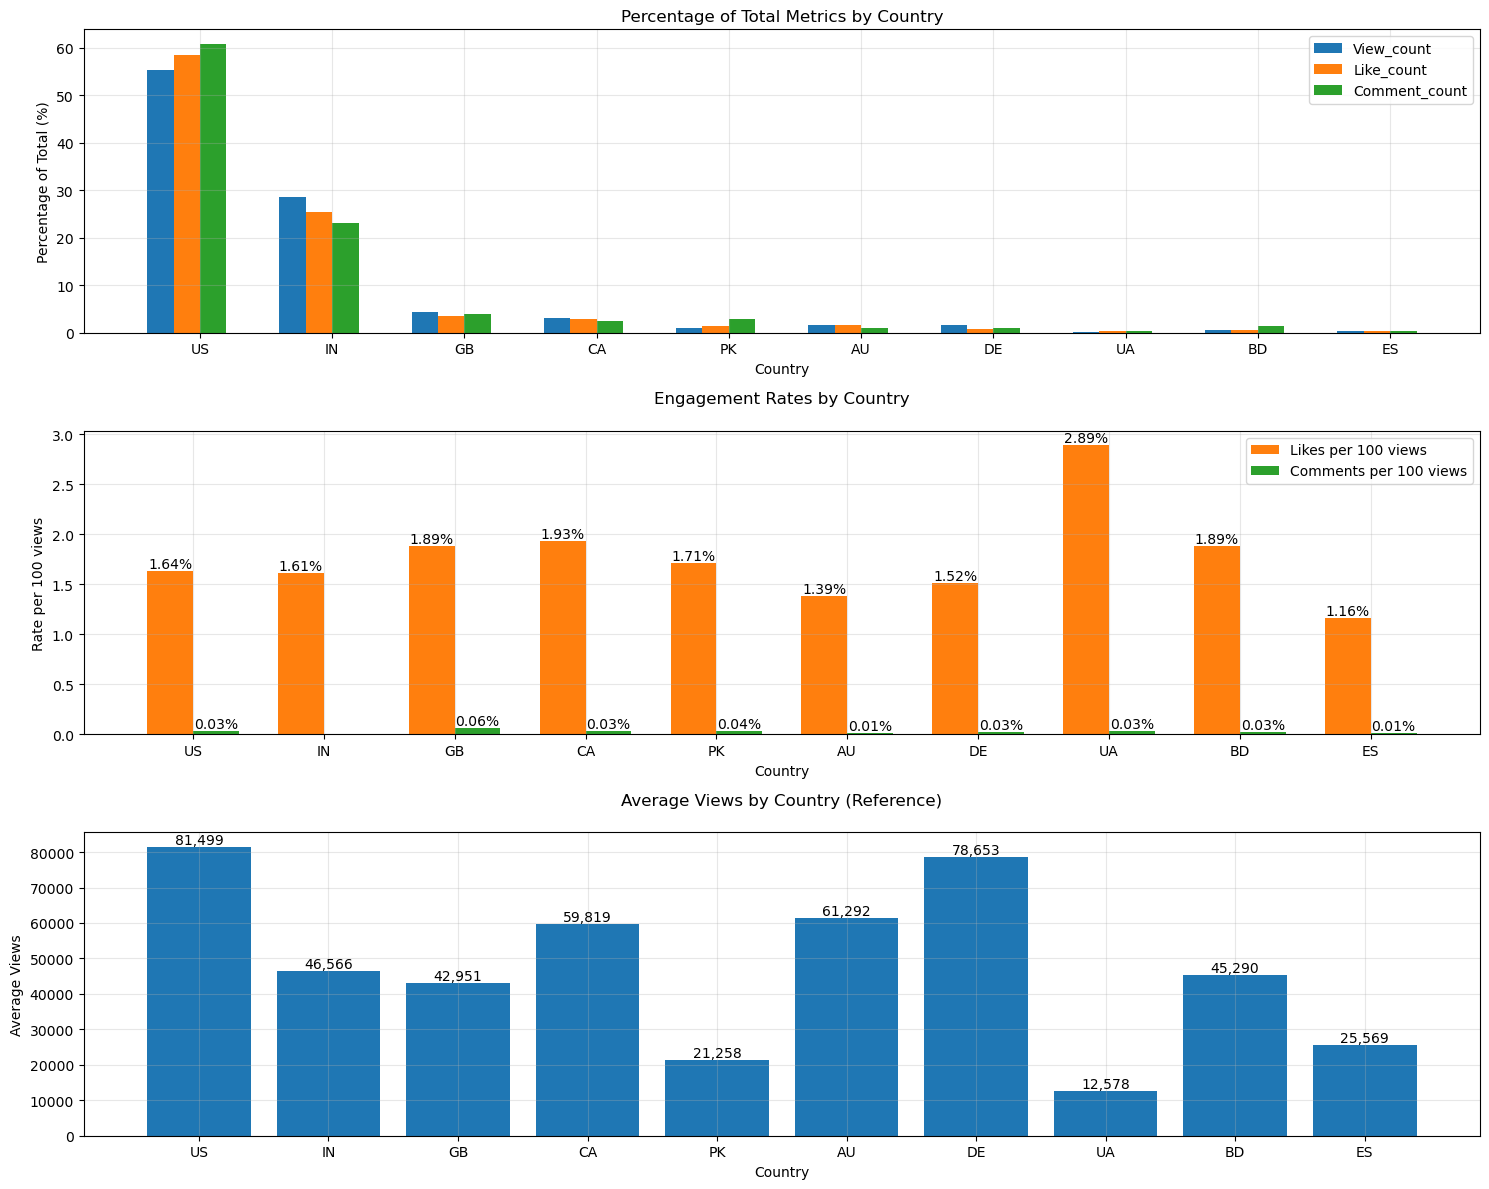

In [14]:
top_countries = df['country'].value_counts().nlargest(10).index
df_top = df[df['country'].isin(top_countries)]
totals = {
    'view_count': df['view_count'].sum(),
    'like_count': df['like_count'].sum(),
    'comment_count': df['comment_count'].sum()
}

metrics = list(totals.keys())
percentages = []
country_stats = []

for country in top_countries:
    country_data = df_top[df_top['country'] == country]
    country_percentages = {'country': country}
    country_averages = {'country': country}
    stats = {
        'country': country,
        'like_rate': (country_data['like_count'] / country_data['view_count'] * 100).mean(),
        'comment_rate': (country_data['comment_count'] / country_data['view_count'] * 100).mean(),
        'avg_views': country_data['view_count'].mean()  # Keep this for reference
    }
    country_stats.append(stats)

    for metric in metrics:
        country_percentages[metric] = (country_data[metric].sum() / totals[metric]) * 100
    percentages.append(country_percentages)
    

df_percentages = pd.DataFrame(percentages)
df_stats = pd.DataFrame(country_stats)

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15, 12))

# Plot 1: Percentages
bar_width = 0.2
x = np.arange(len(top_countries))

for i, metric in enumerate(metrics):
    ax1.bar(x + i * bar_width, 
            df_percentages[metric], 
            bar_width, 
            label=metric.capitalize())

ax1.set_title('Percentage of Total Metrics by Country')
ax1.set_xlabel('Country')
ax1.set_ylabel('Percentage of Total (%)')
ax1.set_xticks(x + bar_width * 1.5)
ax1.set_xticklabels(df_percentages['country'])
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Engagement rates
x = np.arange(len(top_countries))
bar_width = 0.35

ax2.bar(x - bar_width/2, df_stats['like_rate'], bar_width, 
        label='Likes per 100 views', color='#ff7f0e')
ax2.bar(x + bar_width/2, df_stats['comment_rate'], bar_width, 
        label='Comments per 100 views', color='#2ca02c')

ax2.set_title('Engagement Rates by Country', pad=20)
ax2.set_xlabel('Country')
ax2.set_ylabel('Rate per 100 views')
ax2.set_xticks(x)
ax2.set_xticklabels(df_stats['country'])
ax2.legend()
ax2.grid(True, alpha=0.3)

# Add value labels on the bars
for i, v in enumerate(df_stats['like_rate']):
    ax2.text(i - bar_width/2, v, f'{v:.2f}%', ha='center', va='bottom')
for i, v in enumerate(df_stats['comment_rate']):
    ax2.text(i + bar_width/2, v, f'{v:.2f}%', ha='center', va='bottom')

# Plot 3: Average views (for reference)
ax3.bar(x, df_stats['avg_views'], color='#1f77b4')
ax3.set_title('Average Views by Country (Reference)', pad=20)
ax3.set_xlabel('Country')
ax3.set_ylabel('Average Views')
ax3.set_xticks(x)
ax3.set_xticklabels(df_stats['country'])
ax3.grid(True, alpha=0.3)

# Add value labels on the bars
for i, v in enumerate(df_stats['avg_views']):
    ax3.text(i, v, f'{int(v):,}', ha='center', va='bottom')

plt.tight_layout()

Let's see how likes and comments are distributed depending of the views number

In [16]:
indian_stats = country_stats[1]
indian_stats

{'country': 'IN',
 'like_rate': 1.6114420028161272,
 'comment_rate': inf,
 'avg_views': 46566.41865632297}

In [17]:
indian_data = df[df['country']=='IN']
indian_data

,categories,channel_id,crawl_date,dislike_count,display_id,duration,like_count,tags,title,upload_date,...,subscribers_cc,country,is_stem_title,title_matched_keywords,is_stem_tags,tag_matched_tags,tag_matched_keywords,comments,fav_count,comment_count
3,Education,UCPiuJvuyMVFSwcIdBCTpTyQ,2019-11-17 02:22:29.026342,66.0,NN2xMx-GlG8,373,769.0,"Class 11 Physics,hooks law,dronstudy.com,IIT-J...",Rigid Body - Mechanical Properties of Solids :...,2015-07-06 00:00:00,...,914000.0,IN,True,physics,True,"Class 11 Physics, Class XI Physics, IIT Physics",physics,"{""@TopprStudy"": [""\ud83d\udc49 \ud835\udc09\ud...",0.0,68.0
13,Education,UC_4-3wsazYnxNfviEXQ8XTQ,2019-11-20 10:28:45.473250,0.0,N6CqGEcs4-U,319,63.0,"17mat11,Cbcs 17mat11,15mat11,Cbcs 15mat11,15ma...",VTU Engineering Maths 1 Integral reduction exa...,2017-10-14 00:00:00,...,18600.0,IN,True,integral,True,"calculus, functions, indefinite integral, inde...","calculus, functions, integral, integration by ...","{""@ibrahimnawaznawazdhillon7940"": [""Plz solve ...",0.0,2.0
14,Education,UCcv7pspGHmM7AOywuLM1ufA,2019-11-14 09:20:41.633956,0.0,N44GCK2trU4,136,0.0,"JEE Main 2018,JEE mains 2018 solutions,JEE mai...",JEE MAINS 2018 Solve the following differentia...,2017-09-23 00:00:00,...,219000.0,IN,True,differential equations,True,Physics questions of JEE Mains,physics,"{""@Doubtnut"": [""Doubtnut \u0921\u093e\u0909\u0...",0.0,1.0
17,Education,UC85BaVmStZexddgDR2vmqTQ,2019-11-23 03:29:59.420134,12.0,xq51tBOEdY0,3182,251.0,"Physics,Pradeep Kshetrapal",Pradeep Kshetrapal Physics (2014).XII.1.03.Ele...,2014-04-13 00:00:00,...,733000.0,IN,True,physics,True,Physics,physics,"{""@sanvisharma3862"": [""Miss You Sir\ud83d\ude0...",0.0,40.0
19,Education,UC85BaVmStZexddgDR2vmqTQ,2019-11-23 03:29:08.828282,1.0,3UoCCB9crYs,2331,65.0,"Physics,Pradeep Kshetrapal,waves",XI-15-15 Waves Exercise 3 Pradeep Kshetrapal c...,2018-02-10 00:00:00,...,733000.0,IN,True,waves,True,"Physics, waves","physics, waves","{""@bimalnath8463"": [""These people work harder ...",0.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70052,Education,UCaeV-KuLy-kE8VekBD8LOwA,2019-11-03 13:42:23.241056,17.0,zzcHLau6Ttw,446,857.0,"current affairs funda,currentaffairsfunda,SBI ...",IBPS Clerk PRELIMS Inequality Questions [MEMOR...,2016-11-25 00:00:00,...,1160000.0,IN,True,inequality,True,"How to solve coaded inequality for Bank po, In...","inequalities, inequality",NaN,0.0,0.0
70054,Education,UCZQDF0x18Xe6RZayvod99zA,2019-11-16 21:34:25.765711,188.0,zzi9sxgJJmY,324,11178.0,"independence day 2019,indian independence day,...",99% लोग India के बारे में ये 5 Facts नहीं जानत...,2019-08-14 00:00:00,...,4155845.0,IN,True,independence,True,"independence, independence day, independence d...",independence,NaN,0.0,0.0
70056,Education,UCBgofU0cs7Mv-1UDmqISP4Q,2019-11-18 11:39:25.313505,2.0,zzjm3yTmgfM,941,4.0,"Aswininitelugu954,vlrtraining,How to work with...",Law of large numbers program in R language Tel...,2018-04-09 00:00:00,...,20700.0,IN,True,law large numbers,True,Law of large numbers | Probability and Statist...,"probability, simulation, simulations, statistics",NaN,0.0,0.0
70059,Education,UCbjozK_PYCTLEluFlrJ8UZg,2019-11-04 08:48:10.771073,0.0,zzvbTcrdWDE,1091,27.0,"durga,durga sir,durgasoft,interview,questions,...",Adv Java||JDBC Session-111|| Handling Date Val...,2018-01-07 00:00:00,...,438000.0,IN,True,java,True,java,java,NaN,0.0,0.0


In [25]:
((indian_data['like_count'] / indian_data['view_count']) * 100).describe()

count    26482.000000
mean         1.611442
std          1.833521
min          0.000000
25%          0.676055
50%          1.166056
75%          2.001373
max        100.000000
dtype: float64

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

def segment_by_views(data, bins=5):
    """
    Segment videos by view count and analyze engagement metrics for each segment.
    
    Parameters:
    data: pandas DataFrame with analyzed data
    bins: number of segments to create
    
    Returns:
    pandas DataFrame with segment analysis
    """
    data['view_segment'] = pd.qcut(data['view_count'], q=bins, labels=[f'Segment {i+1}' for i in range(bins)])
    
    segment_analysis = data.groupby('view_segment').agg({
        'view_count': 'mean',
        'like_count': 'mean',
        'comment_count': 'mean',
        # 'like_rate': 'mean',
        # 'comment_rate': 'mean'
    }).round(2)
    
    return segment_analysis

/opt/miniconda3/lib/python3.12/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)



Correlations:
views_likes: 0.513
views_comments: 0.025
likes_comments: 0.372


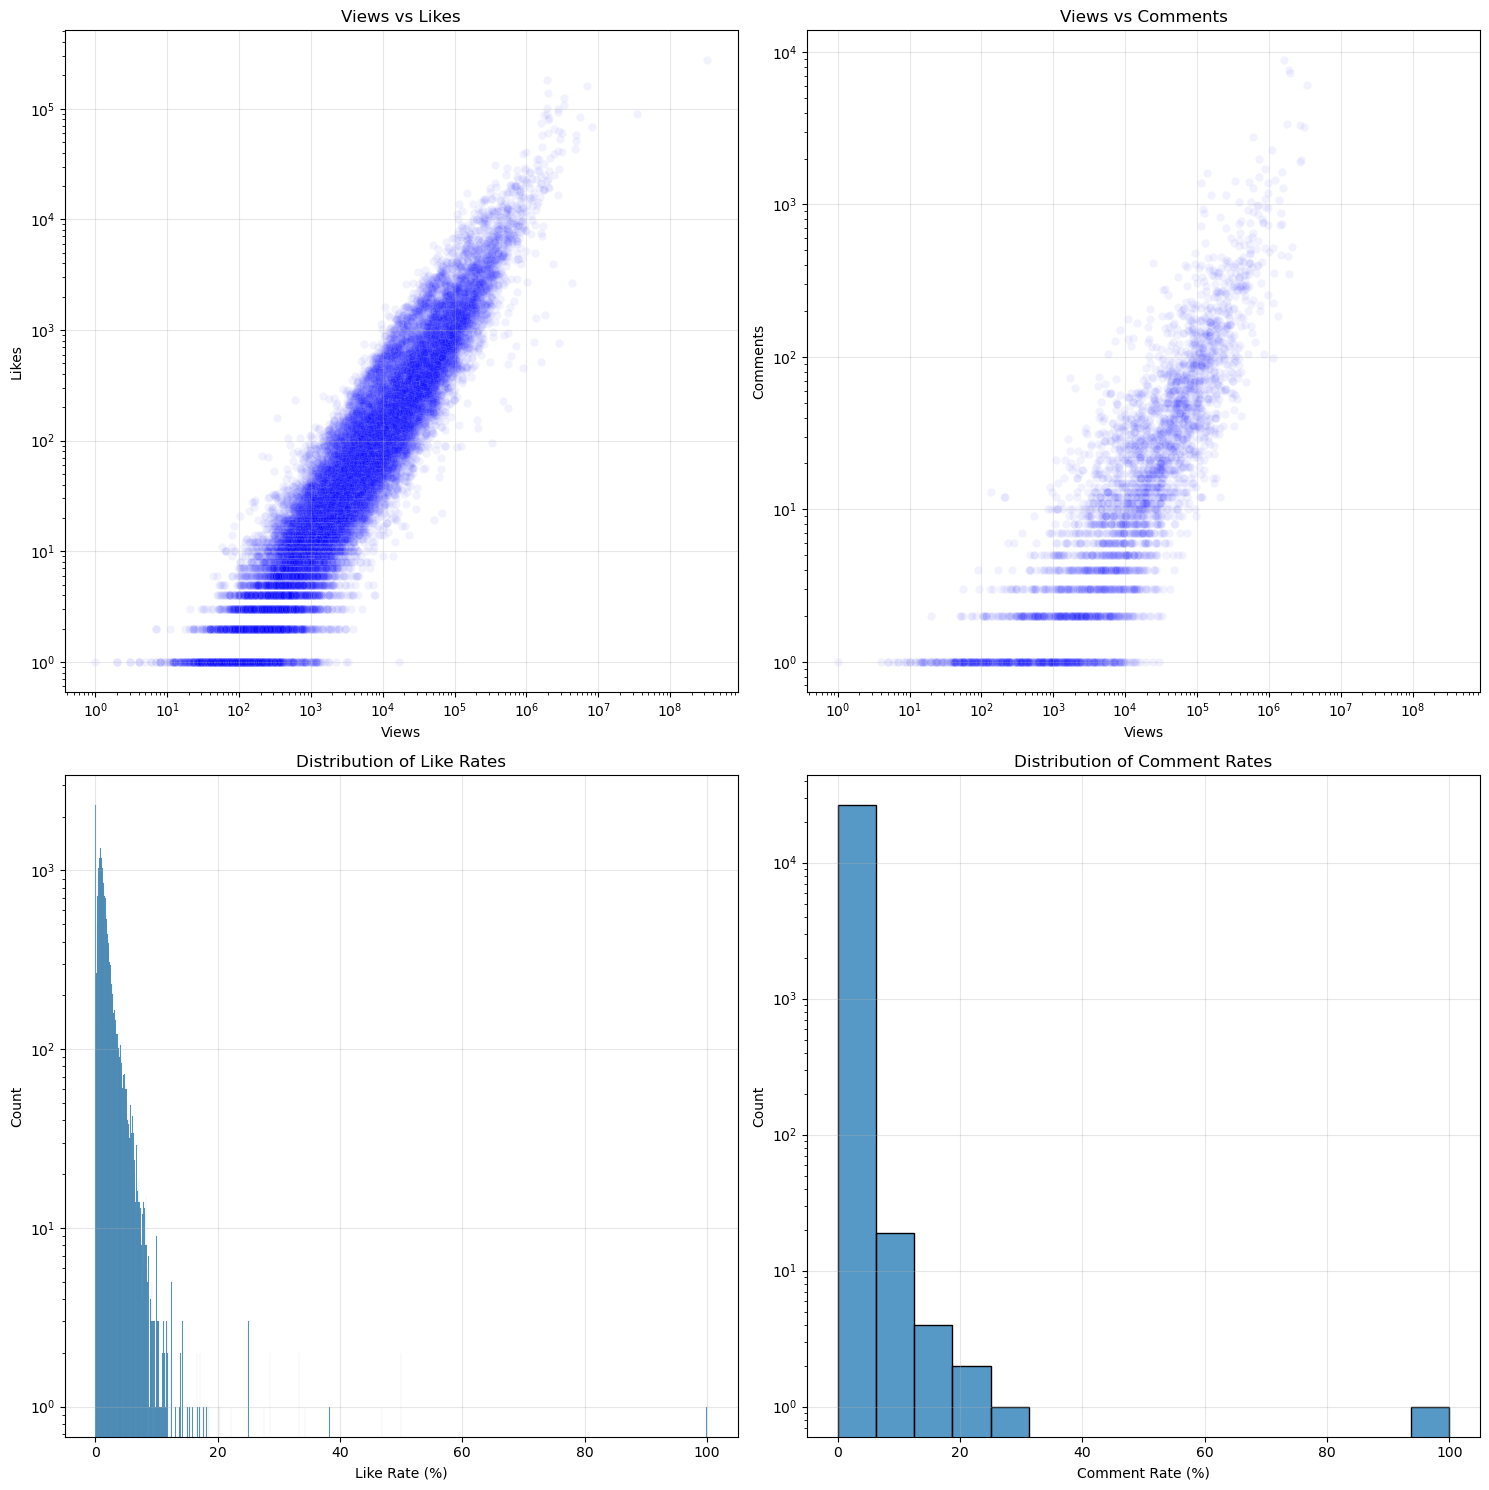

In [51]:
stats_summary = {
    'views': indian_data['view_count'].describe(),
    'likes': indian_data['like_count'].describe(),
    'comments': indian_data['comment_count'].describe(),
    'like_rate': ((indian_data['like_count'] / indian_data['view_count']) * 100).describe(),
    'comment_rate': ((indian_data['comment_count'] / indian_data['view_count']) * 100).describe()
}
correlations = {
    'views_likes': stats.pearsonr(indian_data['view_count'], indian_data['like_count'])[0],
    'views_comments': stats.pearsonr(indian_data['view_count'], indian_data['comment_count'])[0],
    'likes_comments': stats.pearsonr(indian_data['like_count'], indian_data['comment_count'])[0]
}

print("\nCorrelations:")
for key, value in correlations.items():
    print(f"{key}: {value:.3f}")

fig, axes = plt.subplots(2, 2, figsize=(15, 15))

# Scatter plot: Views vs Likes
sns.scatterplot(data=indian_data, x='view_count', y='like_count', ax=axes[0, 0], alpha=0.05, color='blue')
axes[0, 0].set_title('Views vs Likes')
axes[0, 0].set_xscale("log")
axes[0, 0].set_yscale("log")
axes[0, 0].set_xlabel('Views')
axes[0, 0].set_ylabel('Likes')
axes[0, 0].grid(True, alpha=0.3)

# Scatter plot: Views vs Comments
sns.scatterplot(data=indian_data, x='view_count', y='comment_count', ax=axes[0, 1], alpha=0.05, color='blue')
axes[0, 1].set_title('Views vs Comments')
axes[0, 1].set_xscale("log")
axes[0, 1].set_yscale("log")
axes[0, 1].set_xlabel('Views')
axes[0, 1].set_ylabel('Comments')
axes[0, 1].grid(True, alpha=0.3)

# Distribution of like rates
like_rate = (indian_data['like_count'] / indian_data['view_count']) * 100
sns.histplot(data=like_rate, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Like Rates')
# axes[1, 0].set_xscale("log")
axes[1, 0].set_yscale("log")
axes[1, 0].set_xlabel('Like Rate (%)')
axes[1, 0].grid(True, alpha=0.3)

# Distribution of comment rates
comment_rate = (indian_data['comment_count'] / indian_data['view_count']) * 100
sns.histplot(data=comment_rate, ax=axes[1, 1])
# axes[1, 1].set_xscale("log")
axes[1, 1].set_yscale("log")
axes[1, 1].set_title('Distribution of Comment Rates')
axes[1, 1].set_xlabel('Comment Rate (%)')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
    
# # Segment analysis
# segments = segment_by_views(indian_data)
# print("\nSegment Analysis:")
# print(segments)

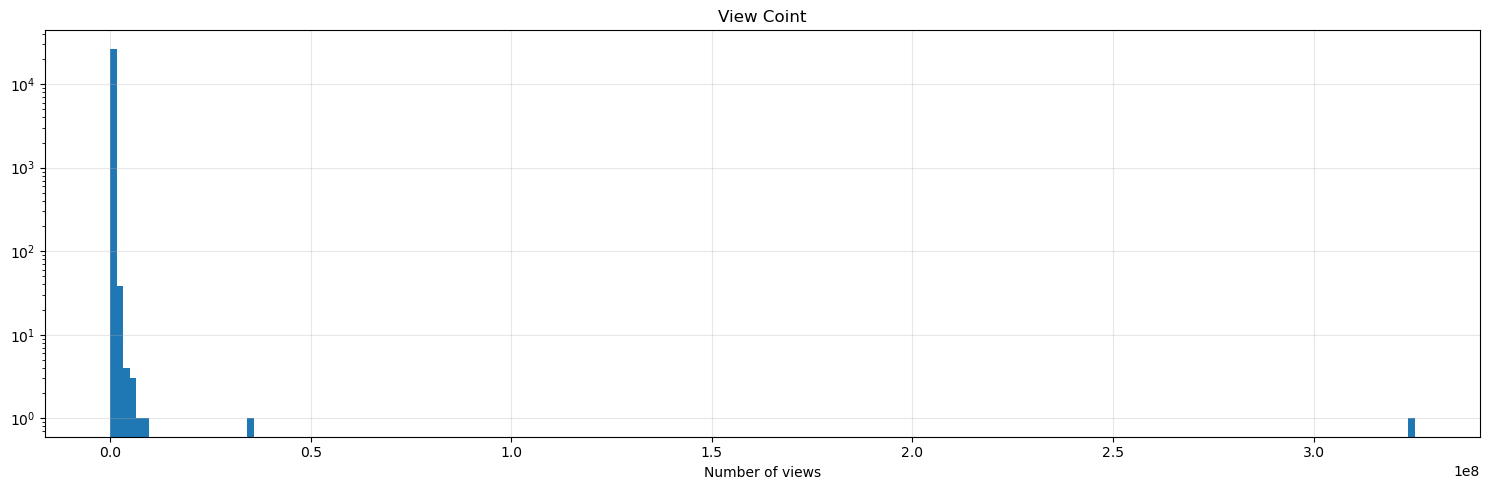

In [78]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
plt.hist(x=indian_data['view_count'], bins=200)
ax.set_title('View Coint')
ax.set_yscale("log")
ax.set_xlabel('Number of views')
ax.grid(True, alpha=0.3)

plt.tight_layout()

In [89]:
framed_data = indian_data[indian_data['view_count']>1000]
framed_data = framed_data[framed_data['view_count']<3e8]

In [92]:
len(framed_data)

26554

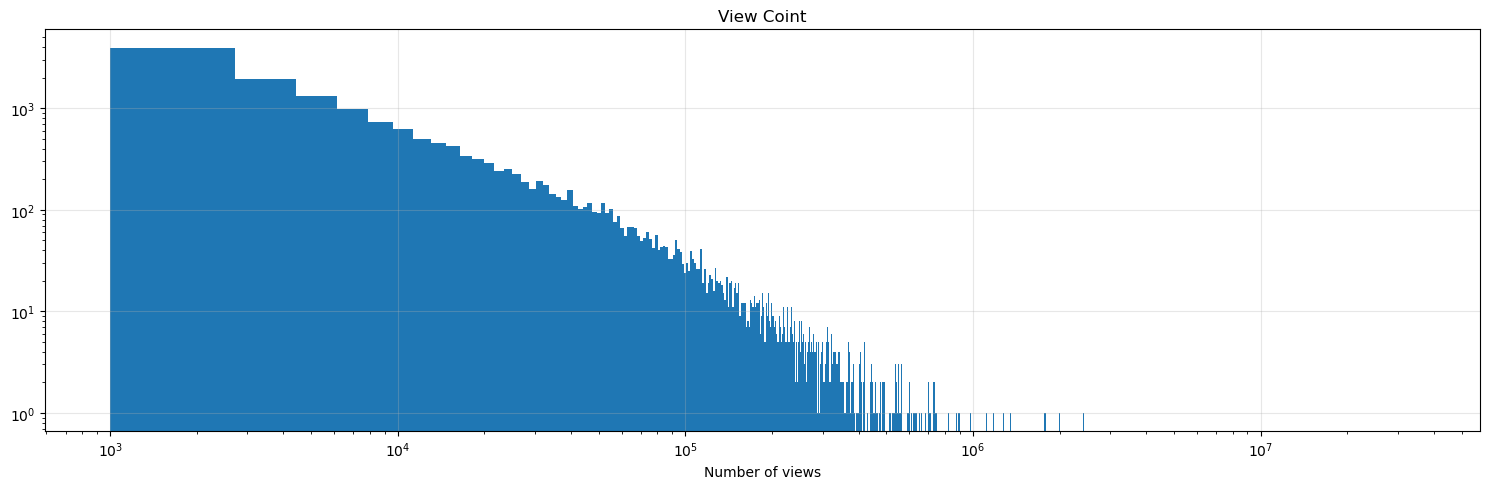

In [95]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
plt.hist(x=framed_data['view_count'], bins=20000)
ax.set_title('View Coint')
ax.set_yscale("log")
ax.set_xscale("log")
ax.set_xlabel('Number of views')
ax.grid(True, alpha=0.3)

plt.tight_layout()


Correlations:
views_likes: 0.947
views_comments: 0.803
likes_comments: 0.856


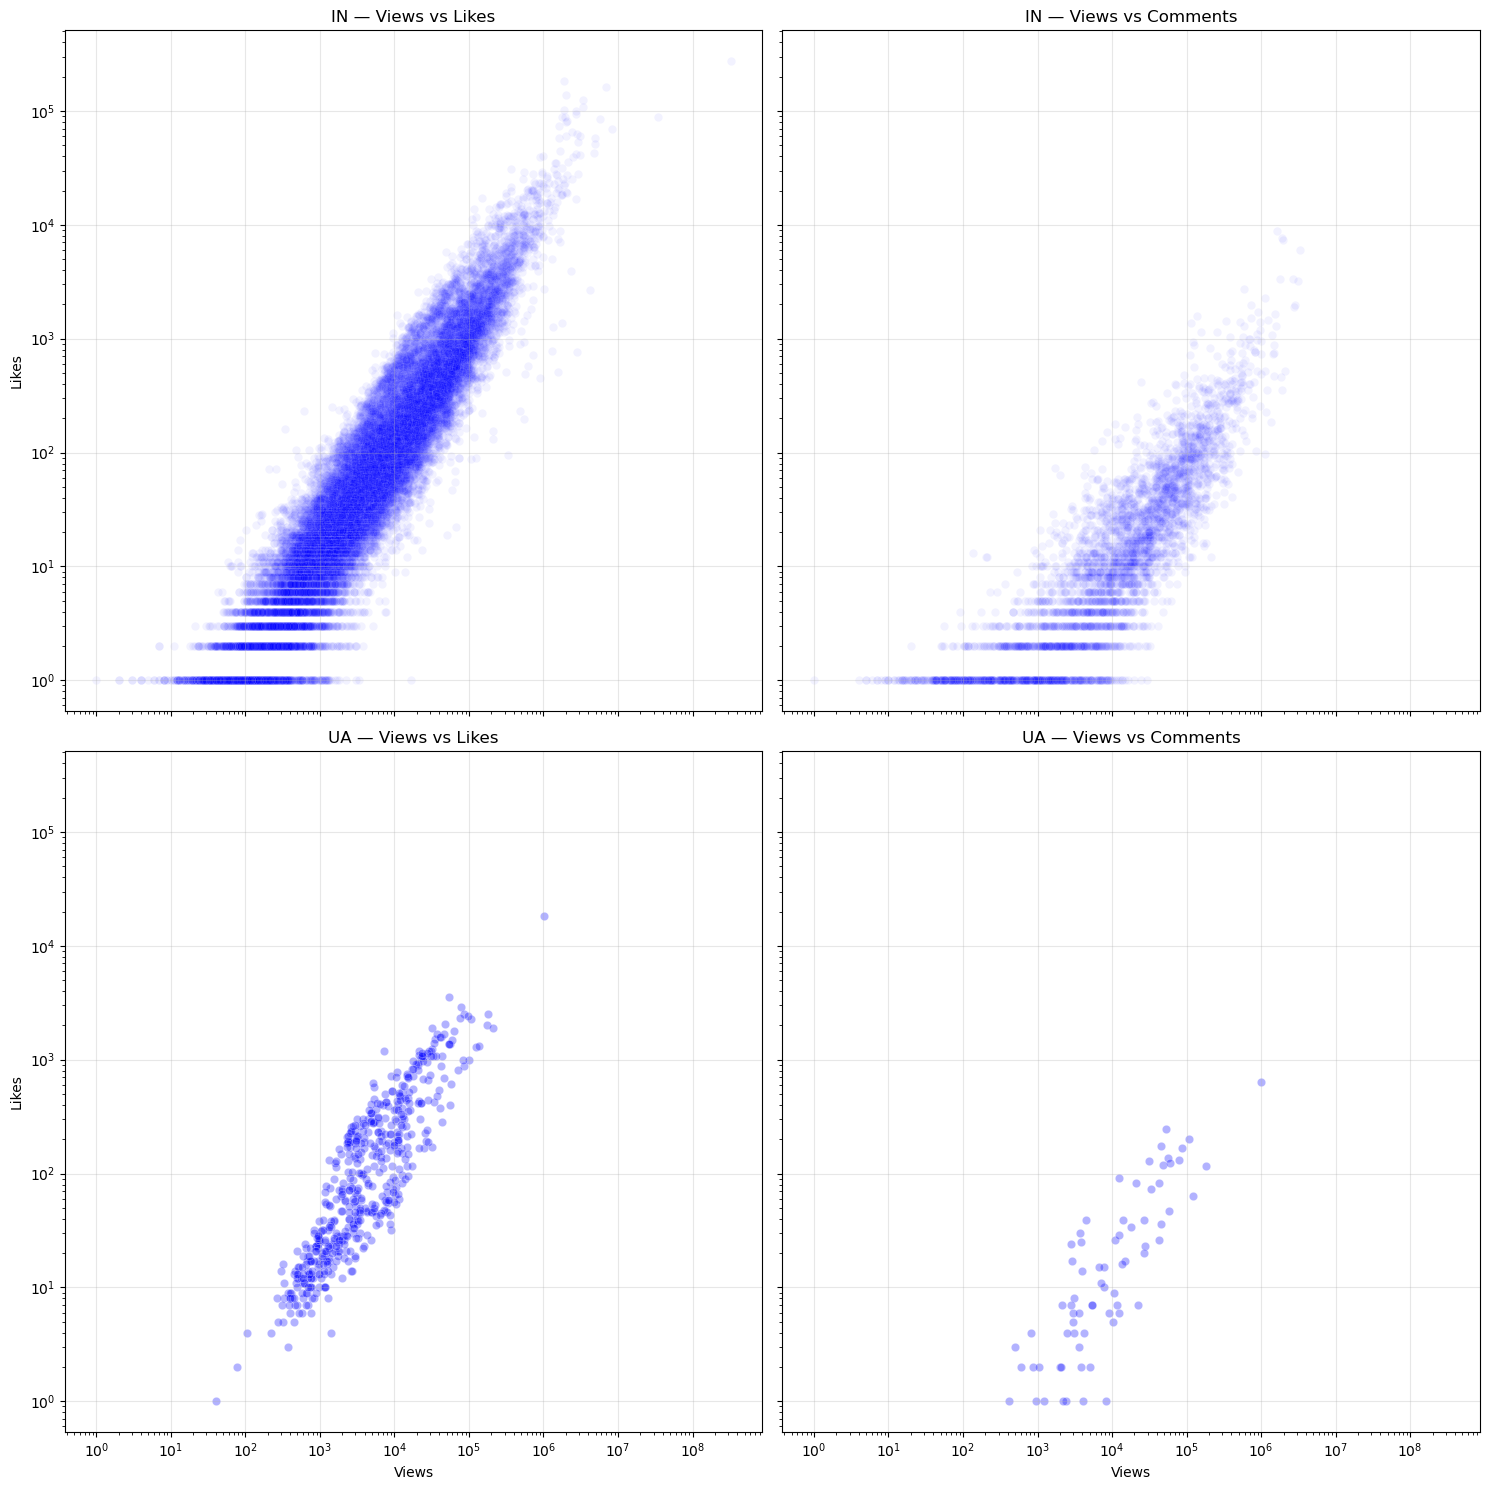

In [128]:
ukrainian_data = df[df['country']=='UA']
stats_summary = {
    'views': ukrainian_data['view_count'].describe(),
    'likes': ukrainian_data['like_count'].describe(),
    'comments': ukrainian_data['comment_count'].describe(),
    'like_rate': ((ukrainian_data['like_count'] / ukrainian_data['view_count']) * 100).describe(),
    'comment_rate': ((ukrainian_data['comment_count'] / ukrainian_data['view_count']) * 100).describe()
}
correlations = {
    'views_likes': stats.pearsonr(ukrainian_data['view_count'], ukrainian_data['like_count'])[0],
    'views_comments': stats.pearsonr(ukrainian_data['view_count'], ukrainian_data['comment_count'])[0],
    'likes_comments': stats.pearsonr(ukrainian_data['like_count'], ukrainian_data['comment_count'])[0]
}

print("\nCorrelations:")
for key, value in correlations.items():
    print(f"{key}: {value:.3f}")

fig, axes = plt.subplots(2, 2, figsize=(15, 15), sharex=True, sharey=True)

sns.scatterplot(data=indian_data, x='view_count', y='like_count', ax=axes[0, 0], alpha=0.05, color='blue')
axes[0, 0].set_title('IN — Views vs Likes')
axes[0, 0].set_xscale("log")
axes[0, 0].set_yscale("log")
axes[0, 0].set_xlabel('Views')
axes[0, 0].set_ylabel('Likes')
axes[0, 0].grid(True, alpha=0.3)

sns.scatterplot(data=indian_data, x='view_count', y='comment_count', ax=axes[0, 1], alpha=0.05, color='blue')
axes[0, 1].set_title('IN — Views vs Comments')
axes[0, 1].set_xscale("log")
axes[0, 1].set_yscale("log")
axes[0, 1].set_xlabel('Views')
axes[0, 1].set_ylabel('Comments')
axes[0, 1].grid(True, alpha=0.3)

# Scatter plot: Views vs Likes
sns.scatterplot(data=ukrainian_data, x='view_count', y='like_count', ax=axes[1, 0], alpha=0.3, color='blue')
axes[1, 0].set_title('UA — Views vs Likes')
axes[1, 0].set_xscale("log")
axes[1, 0].set_yscale("log")
axes[1, 0].set_xlabel('Views')
axes[1, 0].set_ylabel('Likes')
axes[1, 0].grid(True, alpha=0.3)

# Scatter plot: Views vs Comments
sns.scatterplot(data=ukrainian_data, x='view_count', y='comment_count', ax=axes[1, 1], alpha=0.3, color='blue')
axes[1, 1].set_title('UA — Views vs Comments')
axes[1, 1].set_xscale("log")
axes[1, 1].set_yscale("log")
axes[1, 1].set_xlabel('Views')
axes[1, 1].set_ylabel('Comments')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
    

In [117]:
df_top['country'].value_counts()

country
US    29421
IN    26554
GB     4313
CA     2252
PK     2233
AU     1161
DE      924
UA      531
BD      529
ES      526
Name: count, dtype: int64

In [159]:
import numpy as np

# Select 3% of th original data preserving country ratio
sample_size = int(len(df_top) * 0.1)
country_counts = df_top['country'].value_counts()
country_proportions = country_counts / len(df_top)
country_samples = (country_proportions * sample_size).round().astype(int)
diff = sample_size - country_samples.sum()

if diff != 0:
    # Add/subtract the difference from largest groups to minimize impact
    idx = country_samples.nlargest(abs(diff)).index
    for i in idx:
        country_samples[i] += np.sign(diff)

# Sample from each country
sampled_dfs = []
for country, n_samples in country_samples.items():
    # if n_samples < 50:  # At least 50
    #     n_samples = 50
    country_df = df[df['country'] == country]
    sampled_dfs.append(
        country_df.sort_values('view_count', ascending=False)[:n_samples]
    )

# Combine samples
sample = pd.concat(sampled_dfs, ignore_index=True)

# Shuffle the final sample
sample = sample.sample(frac=1).reset_index(drop=True)
len(sample)

6844

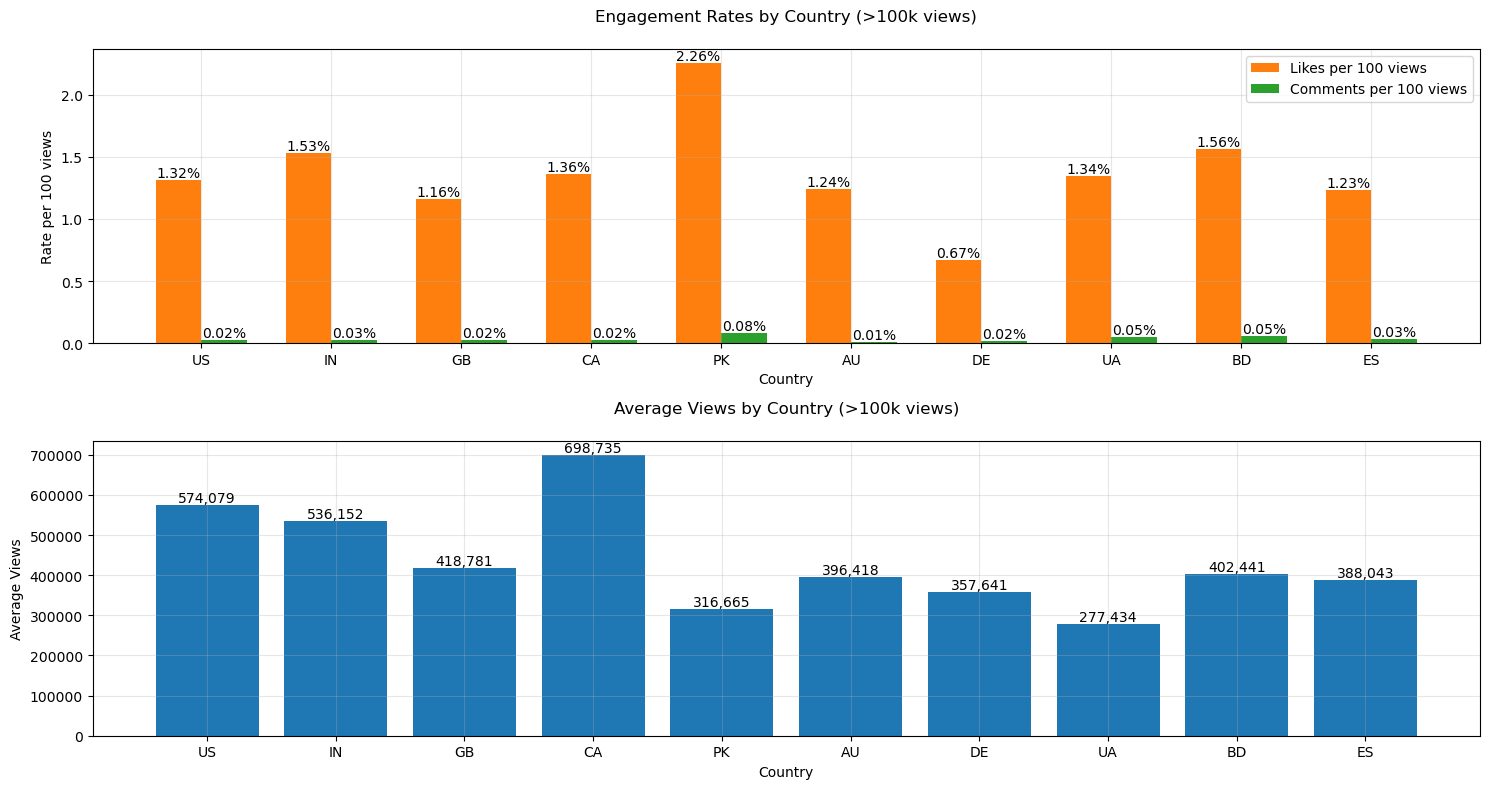

In [170]:
totals = {
    'view_count': sample['view_count'].sum(),
    'like_count': sample['like_count'].sum(),
    'comment_count': sample['comment_count'].sum()
}

metrics = list(totals.keys())
percentages = []
country_stats = []

for country in top_countries:
    country_data = sample[sample['country'] == country]
    country_percentages = {'country': country}
    country_averages = {'country': country}
    stats = {
        'country': country,
        'like_rate': (country_data['like_count'] / country_data['view_count'] * 100).mean(),
        'comment_rate': (country_data['comment_count'] / country_data['view_count'] * 100).mean(),
        'avg_views': country_data['view_count'].mean()  # Keep this for reference
    }
    country_stats.append(stats)

    for metric in metrics:
        country_percentages[metric] = (country_data[metric].sum() / totals[metric]) * 100
    percentages.append(country_percentages)
    

df_percentages = pd.DataFrame(percentages)
df_stats = pd.DataFrame(country_stats)

fig, (ax2, ax3) = plt.subplots(2, 1, figsize=(15, 8))

# Plot 2: Engagement rates
x = np.arange(len(top_countries))
bar_width = 0.35

ax2.bar(x - bar_width/2, df_stats['like_rate'], bar_width, 
        label='Likes per 100 views', color='#ff7f0e')
ax2.bar(x + bar_width/2, df_stats['comment_rate'], bar_width, 
        label='Comments per 100 views', color='#2ca02c')

ax2.set_title('Engagement Rates by Country (>100k views)', pad=20)
ax2.set_xlabel('Country')
ax2.set_ylabel('Rate per 100 views')
ax2.set_xticks(x)
ax2.set_xticklabels(df_stats['country'])
ax2.legend()
ax2.grid(True, alpha=0.3)

# Add value labels on the bars
for i, v in enumerate(df_stats['like_rate']):
    ax2.text(i - bar_width/2, v, f'{v:.2f}%', ha='center', va='bottom')
for i, v in enumerate(df_stats['comment_rate']):
    ax2.text(i + bar_width/2, v, f'{v:.2f}%', ha='center', va='bottom')

# Plot 3: Average views (for reference)
ax3.bar(x, df_stats['avg_views'], color='#1f77b4')
ax3.set_title('Average Views by Country (>100k views)', pad=20)
ax3.set_xlabel('Country')
ax3.set_ylabel('Average Views')
ax3.set_xticks(x)
ax3.set_xticklabels(df_stats['country'])
ax3.grid(True, alpha=0.3)

# Add value labels on the bars
for i, v in enumerate(df_stats['avg_views']):
    ax3.text(i, v, f'{int(v):,}', ha='center', va='bottom')

plt.tight_layout()

In [163]:
country_counts

country
US    29421
IN    26554
GB     4313
CA     2252
PK     2233
AU     1161
DE      924
UA      531
BD      529
ES      526
Name: count, dtype: int64

In [166]:
sample = df_top[df_top['view_count']>100000]
len(sample)

6214

In [171]:
sample['country'].value_counts()

country
US    3517
IN    1781
GB     316
CA     157
DE     156
AU     152
PK      70
BD      39
ES      19
UA       7
Name: count, dtype: int64

In [173]:
indian_popular_sample = sample[sample['country']=='IN']
indian_popular_sample.to_csv('indian_popular_sample.csv', index=False)